In [1]:
%matplotlib inline
import numpy as np
import phconvert as phc
print('phconvert version: ' + phc.__version__)
f="/dataB/smfretData/Tau_D.ptu"
d=phc.pqreader.load_ptu(f)

phconvert version: 0.8.1


In [2]:
print(len(d[0]))

63904724


In [3]:
print(len(d[1]))

63904724


In [4]:
print(len(d[2]))

63904724


In [5]:
print(len(d[3]))

4


In [6]:
import json
#parsed = json.loads(d[3])
print(json.dumps(d[3],indent=4))

{
    "timestamps_unit": 6.249687515624219e-08,
    "nanotimes_unit": 2.50000003337858e-11,
    "acquisition_duration": 36000.0,
    "tags": {
        "File_GUID": {
            "idx": -1,
            "type": "tyAnsiString",
            "value": 40,
            "data": "{182B66A5-AC7B-4ED1-9AC1-0AC8EA539795}"
        },
        "File_CreatingTime": {
            "idx": -1,
            "type": "tyTDateTime",
            "value": "2017-09-12 21:06:55"
        },
        "$StartedByRemoteInterface": {
            "idx": -1,
            "type": "tyBool8",
            "value": true
        },
        "Measurement_SubMode": {
            "idx": -1,
            "type": "tyInt8",
            "value": 1
        },
        "File_Comment": {
            "idx": -1,
            "type": "tyAnsiString",
            "value": 176,
            "data": "{First Dichroic Mirror}: 405/488/561/640\r\n{Pinhole Size(um)}: 99.6\r\n{Scan Direction}: One way\r\n{Scanner Zoom}: 1.000\r\n{Scan Speed}: 2\r\n{Optics}

In [7]:
print(int(d[3]["tags"]["TTResult_SyncRate"]['value']))
print(d[3]["timestamps_unit"]+1)

16000800
1.0000000624968752


(array([  2.47499150e+07,   1.36610000e+04,   1.38080000e+04,
          1.64890000e+04,   1.68530000e+04,   1.71680000e+04,
          2.47770000e+04,   2.40960000e+04,   1.93770000e+04,
          1.98050000e+04,   2.02190000e+04,   1.97592900e+06,
          6.52330700e+06,   5.91576000e+06,   4.38682800e+06,
          3.37957300e+06,   2.56192800e+06,   2.13939700e+06,
          1.72643300e+06,   1.40959000e+06,   1.16355700e+06,
          9.29596000e+05,   8.12648000e+05,   6.83708000e+05,
          5.78674000e+05,   4.73062000e+05,   4.24108000e+05,
          3.62625000e+05,   3.12087000e+05,   2.60295000e+05,
          2.34912000e+05,   2.05616000e+05,   1.78528000e+05,
          1.51118000e+05,   1.38353000e+05,   1.21757000e+05,
          1.07167000e+05,   9.20880000e+04,   8.56750000e+04,
          7.70940000e+04,   6.90800000e+04,   6.27600000e+04,
          5.44580000e+04,   5.17740000e+04,   4.73750000e+04,
          4.34920000e+04,   3.86630000e+04,   3.69590000e+04,
        

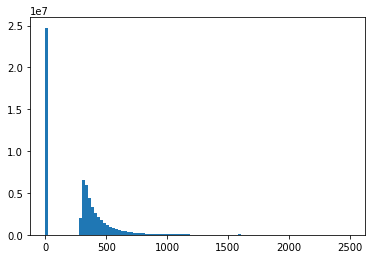

In [8]:
import matplotlib
matplotlib.pyplot.hist(d[2],101)

In [9]:
print(max(d[2]))

2501


In [10]:
for det, count in zip(*np.unique(d[1], return_counts=True)):
    print("%8d   %8d" % (det, count))

       0    3450324
       1   35718020
      65        209
      66        215
      68         94
      72          3
     127   24735859


In [11]:
nanotimes = d[2]
detectors = d[1]
timestamps = d[0]

not_overflow = d[2] != 0

detectors = detectors[not_overflow]
timestamps = timestamps[not_overflow]
nanotimes = nanotimes[not_overflow]
print("Detector    Counts")
print("--------   --------")
for det, count in zip(*np.unique(detectors, return_counts=True)):
    print("%8d   %8d" % (det, count))


Detector    Counts
--------   --------
       0    3450204
       1   35717937


In [12]:
measurement_specs = dict(
    measurement_type = 'smFRET-nsALEX',
    laser_repetition_rate=int(d[3]["tags"]["TTResult_SyncRate"]['value']),
    detectors_specs = {'spectral_ch1': [1],  # list of donor's detector IDs
                       'spectral_ch2': [0]},  # list of acceptor's detector IDs
    alex_excitation_period1=[10,1240],
    alex_excitation_period2=[1260,2490]
    )
tcspc_num_bins=max(d[2])
nanotimes_specs=dict(
    tcspc_unit=float(d[3]["tags"]["MeasDesc_Resolution"]['value']),
    tcspc_num_bins=tcspc_num_bins,
    tcspc_range=float(d[3]["tags"]["MeasDesc_Resolution"]['value'])*tcspc_num_bins
)
photon_data = dict(
    timestamps=timestamps,
    detectors=detectors,
    timestamps_specs={'timestamps_unit': d[3]["timestamps_unit"]},
    measurement_specs=measurement_specs,
    nanotimes_specs=nanotimes_specs,
    nanotimes=nanotimes
)
setup = dict(
    ## Mandatory fields
    num_pixels = 2,                   # using 2 detectors
    num_spots = 1,                    # a single confoca excitation
    num_spectral_ch = 2,              # donor and acceptor detection 
    num_polarization_ch = 1,          # no polarization selection 
    num_split_ch = 1,                 # no beam splitter
    excitation_cw=[False,False],
    modulated_excitation = True,     # CW excitation, no modulation 
    excitation_alternated = [True,True],  # CW excitation, no modulation 
    lifetime = True                 #  TCSPC in detection
)

description = 'This is a fake dataset which mimics smFRET data.'

author = 'kk'
author_affiliation = 'Name of Research Institution'
identity = dict(
    author=author,
    author_affiliation=author_affiliation)
data = dict(
    description=description,
    photon_data = photon_data,
    setup=setup,
    identity=identity,
)
phc.hdf5.save_photon_hdf5(data, h5_fname='Tau_D.h5', overwrite=True)

Saving: Tau_D.h5
Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 


In [13]:
timestamps

array([       3157,        3747,        4417, ..., 50008150058,
       50008306183, 50008475375])

In [14]:
float(d[3]["tags"]["MeasDesc_Resolution"]['value'])

2.50000003337858e-11